# Lendingclub data

- This dataset was downloaded from https://www.kaggle.com/wendykan/lending-club-loan-data

- This data set contains information on loans lend through the lending club platform from 2008 until 2015. For the purpose of this analysis, loans that have already been paid off will be compared to loans that have default of charged off (This means that these loans have gone >120 days without making a payment). The primary purose of this analysis is to determine what are the main differences in characteristics between borrowers that repay their loans vs borrowers that do not repay. For several of the columns, there is missing data which we will deal with by imputing zeros. This might not be the best way to handle this missing data; we could alternatively impute using the median or average of each column. When looking at the SQL calls, it should be kept in mind that the affected columns may have artificially low means due to imputing zero for null values. 

### Description of the initial columns


**addr_state**	The state provided by the borrower in the loan application

**annual_inc**	The self-reported annual income provided by the borrower during registration.

**annual_inc_joint**	The combined self-reported annual income provided by the co-borrowers during registration

**application_type**	Indicates whether the loan is an individual application or a joint application with two co-borrowers

**collection_recovery_fee**	post charge off collection fee

**collections_12_mths_ex_med**	Number of collections in 12 months excluding medical collections

**delinq_2yrs**	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

**desc**	Loan description provided by the borrower

**dti**	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**dti_joint**	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

**earliest_cr_line**	The month the borrower's earliest reported credit line was opened

**emp_length**	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

**emp_title**	The job title supplied by the Borrower when applying for the loan.*

**fico_range_high**	The upper boundary range the borrower’s FICO at loan origination belongs to.

**fico_range_low**	The lower boundary range the borrower’s FICO at loan origination belongs to.

**funded_amnt	**The total amount committed to that loan at that point in time.

**funded_amnt_inv**	The total amount committed by investors for that loan at that point in time.

**grade**	LC assigned loan grade

**home_ownership**	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

**id**	A unique LC assigned ID for the loan listing.

**initial_list_status**	The initial listing status of the loan. Possible values are – W, F

**inq_last_6mths**	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

**installment**	The monthly payment owed by the borrower if the loan originates.

**int_rate**	Interest Rate on the loan

**is_inc_v**	Indicates if income was verified by LC, not verified, or if the income source was verified

**issue_d**	The month which the loan was funded

**last_credit_pull_d**	The most recent month LC pulled credit for this loan

**last_fico_range_high**	The upper boundary range the borrower’s last FICO pulled belongs to.

**last_fico_range_low**	The lower boundary range the borrower’s last FICO pulled belongs to.

**last_pymnt_amnt**	Last total payment amount received

**last_pymnt_d**	Last month payment was received

**loan_amnt**	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**loan_status**	Current status of the loan

**member_id**	A unique LC assigned Id for the borrower member.

**mths_since_last_delinq**	The number of months since the borrower's last delinquency.

**mths_since_last_major_derog**	Months since most recent 90-day or worse rating

**mths_since_last_record**	The number of months since the last public record.

**next_pymnt_d**	Next scheduled payment date

**open_acc**	The number of open credit lines in the borrower's credit file.

**out_prncp**	Remaining outstanding principal for total amount funded

**out_prncp_inv**	Remaining outstanding principal for portion of total amount funded by investors

**policy_code**	"publicly available policy_code=1
new products not publicly available policy_code=2"

**pub_rec**	Number of derogatory public records

**purpose**	A category provided by the borrower for the loan request. 

**pymnt_plan**	Indicates if a payment plan has been put in place for the loan

**recoveries**	post charge off gross recovery

**revol_bal**	Total credit revolving balance

**revol_util**	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**sub_grade**	LC assigned loan subgrade

**term**	The number of payments on the loan. Values are in months and can be either 36 or 60.

**title**	The loan title provided by the borrower

**total_acc**	The total number of credit lines currently in the borrower's credit file

**total_pymnt**	Payments received to date for total amount funded

**total_pymnt_inv**	Payments received to date for portion of total amount funded by investors

**total_rec_int**	Interest received to date

**total_rec_late_fee**	Late fees received to date

**total_rec_prncp**	Principal received to date

**url**	URL for the LC page with listing data.

**verified_status_joint**	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified

**zip_code**	The first 3 numbers of the zip code provided by the borrower in the loan application.

**open_acc_6m**	Number of open trades in last 6 months

**open_il_6m**	Number of currently active installment trades

**open_il_12m**	Number of installment accounts opened in past 12 months

**open_il_24m**	Number of installment accounts opened in past 24 months

**mths_since_rcnt_il**	Months since most recent installment accounts opened

**total_bal_il**	Total current balance of all installment accounts

**il_util**	Ratio of total current balance to high credit/credit limit on all install acct
	
**open_rv_12m**	Number of revolving trades opened in past 12 months

**open_rv_24m**	Number of revolving trades opened in past 24 months

**max_bal_bc**	Maximum current balance owed on all revolving accounts

**all_util**	Balance to credit limit on all trades

**total_rev_hi_lim**  	Total revolving high credit/credit limit

**inq_fi**	Number of personal finance inquiries

**total_cu_tl**	Number of finance trades

**inq_last_12m**	Number of credit inquiries in past 12 months

**acc_now_delinq**	The number of accounts on which the borrower is now delinquent.

**tot_coll_amt**	Total collection amounts ever owed

**tot_cur_bal**	Total current balance of all accounts
	
	* Employer Title replaces Employer Name for all loans listed after 9/23/2013


In [1]:
import pandas as pd
import seaborn as sns
from numpy import random
import numpy as np

from sqlalchemy import create_engine

random.seed(1234)
sns.set(font_scale=1.5)


In [2]:
loan_data = pd.read_csv('loan-stats.csv')

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data_df = pd.DataFrame(loan_data)

In [4]:
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

# This analysis will focus only on the loans that are fully paid vs loans that have defaulted or charged off (this means a loan has gone >120 days without a payment).

In [5]:
loan_data_df.loan_status[loan_data_df.loan_status=='Fully Paid'].count()

207723

In [6]:
loan_data_df.loan_status[loan_data_df.loan_status=='Default'].count()

1219

In [7]:
loan_data_df.loan_status[loan_data_df.loan_status=='Charged Off'].count()

45248

- 207,723 loans that were fully paid off
- 45,248 loans that were charged off
- 1,219 loans that were defaulted on

I am going to create a new df with loans that are fully paid, defaulted, or charged off.

In [8]:
#df = df.drop(df[<some boolean condition>].index)
#loan_data_dropped_df = loan_data_df.copy()

fully_paid = loan_data_df[loan_data_df.loan_status=='Fully Paid']
default = loan_data_df[loan_data_df.loan_status=='Default']
charged_off = loan_data_df[loan_data_df.loan_status=='Charged Off']
#loan_data_dropped_df = loan_data_df[fully_paid & default & charged_off]

loan_data_dropped_df = pd.concat((fully_paid,default,charged_off))
loan_data_dropped_df.describe()


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,2.541900e+05,2.541900e+05,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,...,144.000000,126.000000,144.000000,144.000000,144.000000,144.000000,1.904640e+05,144.000000,144.000000,144.000000
mean,1.234067e+07,1.366169e+07,13570.590897,13530.210374,13437.613928,13.776014,418.273195,7.251051e+04,16.560534,0.250533,...,36462.312500,73.657937,1.673611,3.555556,5517.340278,58.945139,2.969485e+04,1.256944,2.097222,2.625000
std,1.479726e+07,1.576494e+07,8133.386869,8111.020870,8129.476448,4.404088,244.912615,5.878545e+04,7.794390,0.742390,...,38137.563875,23.074812,1.629406,2.932284,4507.604776,20.356957,2.949980e+04,1.792551,3.903234,4.057067
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000e+00,0.000000,0.000000,-4.000000
25%,1.462514e+06,1.709671e+06,7250.000000,7200.000000,7200.000000,10.740000,239.560000,4.500000e+04,10.770000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.321818e+06,7.660992e+06,12000.000000,12000.000000,11975.000000,13.530000,365.230000,6.200000e+04,16.220000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.655208e+07,1.858534e+07,18250.000000,18125.000000,18000.000000,16.550000,547.550000,8.700000e+04,22.010000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.860466e+07,7.350742e+07,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,...,249212.000000,129.200000,8.000000,21.000000,22279.000000,102.800000,2.013133e+06,9.000000,21.000000,19.000000


In [9]:
loan_data_dropped_df.loan_status.unique()

array(['Fully Paid', 'Default', 'Charged Off'], dtype=object)

In [10]:
#Verify the number of loans we have
print(loan_data_dropped_df.loan_status.count(), \
      (loan_data_df.loan_status[loan_data_df.loan_status=='Charged Off'].count() \
       +loan_data_df.loan_status[loan_data_df.loan_status=='Default'].count() \
       +loan_data_df.loan_status[loan_data_df.loan_status=='Fully Paid'].count()))

254190 254190


## Next let's address out null values

In [11]:
##which columns have null data
loan_data_dropped_df=loan_data_dropped_df.fillna(0)
pd.isnull(loan_data_dropped_df).any()

id                             False
member_id                      False
loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
installment                    False
grade                          False
sub_grade                      False
emp_title                      False
emp_length                     False
home_ownership                 False
annual_inc                     False
verification_status            False
issue_d                        False
loan_status                    False
pymnt_plan                     False
url                            False
desc                           False
purpose                        False
title                          False
zip_code                       False
addr_state                     False
dti                            False
delinq_2yrs                    False
earliest_cr_line               False
i

In [12]:
loan_data_dropped_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,2.541900e+05,2.541900e+05,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,...,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,254190.000000
mean,1.234067e+07,1.366169e+07,13570.590897,13530.210374,13437.613928,13.776014,418.273195,7.251051e+04,16.560534,0.250533,...,20.656096,0.036512,0.000948,0.002014,3.125603,0.033393,2.225029e+04,0.000712,0.001188,0.001487
std,1.479726e+07,1.576494e+07,8133.386869,8111.020870,8129.476448,4.404088,244.912615,5.878545e+04,7.794390,0.742390,...,1253.392891,1.717524,0.055493,0.109521,169.310259,1.483363,2.859565e+04,0.051983,0.105172,0.114722
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,1.462514e+06,1.709671e+06,7250.000000,7200.000000,7200.000000,10.740000,239.560000,4.500000e+04,10.770000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,6.321818e+06,7.660992e+06,12000.000000,12000.000000,11975.000000,13.530000,365.230000,6.200000e+04,16.220000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+04,0.000000,0.000000,0.000000
75%,1.655208e+07,1.858534e+07,18250.000000,18125.000000,18000.000000,16.550000,547.550000,8.700000e+04,22.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.070000e+04,0.000000,0.000000,0.000000
max,6.860466e+07,7.350742e+07,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,...,249212.000000,129.200000,8.000000,21.000000,22279.000000,102.800000,2.013133e+06,9.000000,21.000000,19.000000


# Next, drop the columns where the majority of values are =0. This will be, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m, open_il_6m, open_il_12m,open_il_24m,mths_since_rcnt_il

In [13]:
loan_data_removecol_df = loan_data_dropped_df.drop(['il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',\
                                                 'inq_fi','total_cu_tl','inq_last_12m','open_il_6m', \
                                                 'open_il_12m','open_il_24m','mths_since_rcnt_il' ] , axis=1)

In [14]:
loan_data_removecol_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,total_bal_il,total_rev_hi_lim
count,2.541900e+05,2.541900e+05,254190.000000,254190.000000,254190.000000,254190.000000,254190.000000,2.541900e+05,254190.000000,254190.000000,...,254190.000000,254190.0,254190.000000,254190.000000,254190.000000,2.541900e+05,2.541900e+05,254190.000000,254190.000000,2.541900e+05
mean,1.234067e+07,1.366169e+07,13570.590897,13530.210374,13437.613928,13.776014,418.273195,7.251051e+04,16.560534,0.250533,...,8.173425,1.0,0.141626,0.000069,0.003124,1.523941e+02,1.035233e+05,0.000791,20.656096,2.225029e+04
std,1.479726e+07,1.576494e+07,8133.386869,8111.020870,8129.476448,4.404088,244.912615,5.878545e+04,7.794390,0.742390,...,19.389902,0.0,71.404120,0.034909,0.060602,1.820895e+04,1.448185e+05,0.046127,1253.392891,2.859565e+04
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.462514e+06,1.709671e+06,7250.000000,7200.000000,7200.000000,10.740000,239.560000,4.500000e+04,10.770000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,6.321818e+06,7.660992e+06,12000.000000,12000.000000,11975.000000,13.530000,365.230000,6.200000e+04,16.220000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,3.819450e+04,0.000000,0.000000,1.600000e+04
75%,1.655208e+07,1.858534e+07,18250.000000,18125.000000,18000.000000,16.550000,547.550000,8.700000e+04,22.010000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,1.648628e+05,0.000000,0.000000,3.070000e+04
max,6.860466e+07,7.350742e+07,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,...,159.000000,1.0,36000.000000,17.600000,5.000000,9.152545e+06,8.000078e+06,6.000000,249212.000000,2.013133e+06


In [15]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

## Import this DF into a sqlite database.



In [16]:
#Just to make sure we have correct naming for column names
new_names = []

for col in loan_data_removecol_df.columns:
    new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower())

loan_data_removecol_df.columns = new_names

print(loan_data_removecol_df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [17]:
engine = create_engine('sqlite:///lending_club_dropped.db')
conn = engine.connect()
loan_data_removecol_df.to_sql('lending_club_dropped', conn)

ValueError: Table 'lending_club_dropped' already exists.

    Now time to write some sql queries

In [18]:


pd.read_sql('SELECT * FROM lending_club_dropped;',engine)


,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,total_bal_il,total_rev_hi_lim
0,0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,10,1070078,1305201,6500.0,6500.0,6500.000000,60 months,14.65,153.45,C,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,11,1069908,1305008,12000.0,12000.0,12000.000000,36 months,12.69,402.54,B,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,13,1069866,1304956,3000.0,3000.0,3000.000000,36 months,9.91,96.68,B,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,15,1069759,1304871,1000.0,1000.0,1000.000000,36 months,16.29,35.31,D,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,16,1065775,1299699,10000.0,10000.0,10000.000000,36 months,15.27,347.98,C,...,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


# SQl
- What is the average loan_amount and interest rate by grade for each type of loan (paid off of default/charged off)?

In [19]:
pd.read_sql("SELECT AVG(loan_amnt) as average_loan_size, AVG(int_rate) as average_interest, grade, loan_status, \
            AVG(mths_since_last_delinq),COUNT(grade) as num_of_loans,AVG(dti) as debt_to_income,avg(annual_inc)\
            FROM lending_club_dropped  \
            WHERE loan_status = 'Fully Paid' \
            GROUP BY grade;",engine)

,average_loan_size,average_interest,grade,loan_status,AVG(mths_since_last_delinq),num_of_loans,debt_to_income,avg(annual_inc)
0,12259.117543,7.488409,A,Fully Paid,10.393987,39679,14.019528,80483.128232
1,12384.274036,11.514316,B,Fully Paid,15.840246,66546,15.943894,72384.464453
2,13225.645431,14.571925,C,Fully Paid,17.207468,52678,16.793426,71444.363016
3,14090.505496,17.519152,D,Fully Paid,18.119920,30020,17.306454,71377.583918
4,17594.421024,20.224206,E,Fully Paid,17.994044,12928,17.631237,77803.172045
5,19058.887008,23.342537,F,Fully Paid,17.672662,4726,17.552017,80223.064970
6,21431.173647,25.027365,G,Fully Paid,17.377836,1146,17.556152,90262.095079


In [20]:
pd.read_sql("SELECT AVG(loan_amnt) as average_loan_size, AVG(int_rate) as average_interest, grade, loan_status,\
        AVG(mths_since_last_delinq), COUNT(grade) as num_of_loans, AVG(dti) as debt_to_income,avg(annual_inc)\
            FROM lending_club_dropped  \
            WHERE loan_status ='Default' \
            GROUP BY grade;",engine) 

,average_loan_size,average_interest,grade,loan_status,AVG(mths_since_last_delinq),num_of_loans,debt_to_income,avg(annual_inc)
0,14974.468085,7.722553,A,Default,16.680851,47,16.788298,101624.170213
1,13089.772727,11.340000,B,Default,13.904040,198,18.071869,68864.342121
2,13833.402778,14.272389,C,Default,15.213889,360,19.619778,62411.119972
3,16252.724359,17.318365,D,Default,18.820513,312,20.590769,65464.852564
4,16869.029851,20.167214,E,Default,18.592040,201,21.426269,67578.131592
5,17412.974684,24.041519,F,Default,15.405063,79,22.281519,64847.278481
6,18570.454545,25.974545,G,Default,18.500000,22,19.179545,61937.634545


In [21]:
pd.read_sql("SELECT AVG(loan_amnt) as average_loan_size, AVG(int_rate) as average_interest, grade, annual_inc, loan_status,AVG(mths_since_last_delinq),\
            COUNT(grade) as num_of_loa, AVG(dti) as debt_to_income, AVG(annual_inc)\
            FROM lending_club_dropped  \
            WHERE loan_status ='Charged Off' \
            GROUP BY grade;",engine)

,average_loan_size,average_interest,grade,annual_inc,loan_status,AVG(mths_since_last_delinq),num_of_loa,debt_to_income,AVG(annual_inc)
0,11872.764616,7.820592,A,46500.0,Charged Off,10.312572,2617,15.870344,66779.869660
1,12520.088770,11.799493,B,50000.0,Charged Off,14.338586,9519,17.370823,63114.451657
2,13512.990429,14.867335,C,62000.0,Charged Off,15.390049,12642,18.564382,63024.875968
3,14537.819474,17.750135,D,48000.0,Charged Off,16.263303,10486,18.865661,63440.755335
4,17761.229626,20.591512,E,32000.0,Charged Off,16.569191,6258,19.508717,69144.608423
5,19471.088957,23.556125,F,98000.0,Charged Off,16.196660,2934,19.128701,71598.601149
6,21263.446970,25.054520,G,75000.0,Charged Off,15.377525,792,19.057702,81622.731351


# What about grouped by loan_status?

In [22]:
pd.read_sql("SELECT AVG(loan_amnt) as average_loan_size, AVG(int_rate) as average_interest, loan_status,AVG(mths_since_last_delinq),\
            COUNT(grade) as num_of_loans, AVG(dti) as debt_to_income, AVG(annual_inc)\
            FROM lending_club_dropped   \
            GROUP BY loan_status;",engine)

,average_loan_size,average_interest,loan_status,AVG(mths_since_last_delinq),num_of_loans,debt_to_income,AVG(annual_inc)
0,14556.293096,16.015850,Charged Off,15.292720,45248,18.403126,65085.132717
1,15193.847416,16.139459,Default,16.609516,1219,19.970131,66754.126612
2,13346.350910,13.274244,Fully Paid,15.660307,207723,16.139156,74161.752983


# Back to Python

### For the next part of this analysis, we will primarily look at either loans that have defaulted or charged off vs loans that have been paid off.

In [23]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
loan_removecol_paid_df = loan_data_removecol_df[loan_data_removecol_df.loan_status=='Fully Paid']
charged_off = loan_data_removecol_df[loan_data_removecol_df.loan_status=='Charged Off']
default = loan_data_removecol_df[loan_data_removecol_df.loan_status=='Default']
loan_remove_col_default_chargedoff_df =pd.concat((charged_off,default))

In [25]:
loan_removecol_paid_df.id.count()

207723

In [26]:
loan_remove_col_default_chargedoff_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,total_bal_il,total_rev_hi_lim
count,4.646700e+04,4.646700e+04,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,4.646700e+04,46467.000000,46467.000000,...,46467.000000,46467.0,46467.0,46467.0,46467.000000,46467.000000,4.646700e+04,46467.0,46467.0,4.646700e+04
mean,1.139438e+07,1.271197e+07,14573.018486,14528.669271,14411.372330,16.019092,441.073219,6.512892e+04,18.444234,0.278757,...,8.341985,1.0,0.0,0.0,0.003938,104.953042,8.964967e+04,0.0,0.0,2.070076e+04
std,1.231704e+07,1.316284e+07,8391.928489,8366.116179,8390.706853,4.301283,246.793319,5.686452e+04,7.950591,0.799408,...,19.478848,0.0,0.0,0.0,0.070703,1152.924656,1.225158e+05,0.0,0.0,2.499265e+04
min,5.716700e+04,8.035300e+04,900.000000,900.000000,0.000000,5.420000,21.620000,4.080000e+03,0.000000,0.000000,...,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00
25%,1.593010e+06,1.847868e+06,8000.000000,8000.000000,8000.000000,13.050000,265.810000,4.000000e+04,12.610000,0.000000,...,0.000000,1.0,0.0,0.0,0.000000,0.000000,8.008500e+03,0.0,0.0,5.100000e+03
50%,6.754617e+06,8.135759e+06,12700.000000,12600.000000,12400.000000,15.800000,391.170000,5.600000e+04,18.380000,0.000000,...,0.000000,1.0,0.0,0.0,0.000000,0.000000,3.663000e+04,0.0,0.0,1.580000e+04
75%,1.563112e+07,1.759362e+07,20000.000000,20000.000000,19975.000000,18.920000,573.320000,7.800000e+04,24.140000,0.000000,...,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.378180e+05,0.0,0.0,2.890000e+04
max,6.051698e+07,6.453775e+07,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,39.980000,18.000000,...,152.000000,1.0,0.0,0.0,5.000000,95806.000000,3.437283e+06,0.0,0.0,1.998700e+06


In [27]:
loan_remove_col_default_chargedoff_df.id.count()

46467

In [28]:
list(loan_remove_col_default_chargedoff_df.columns.values)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

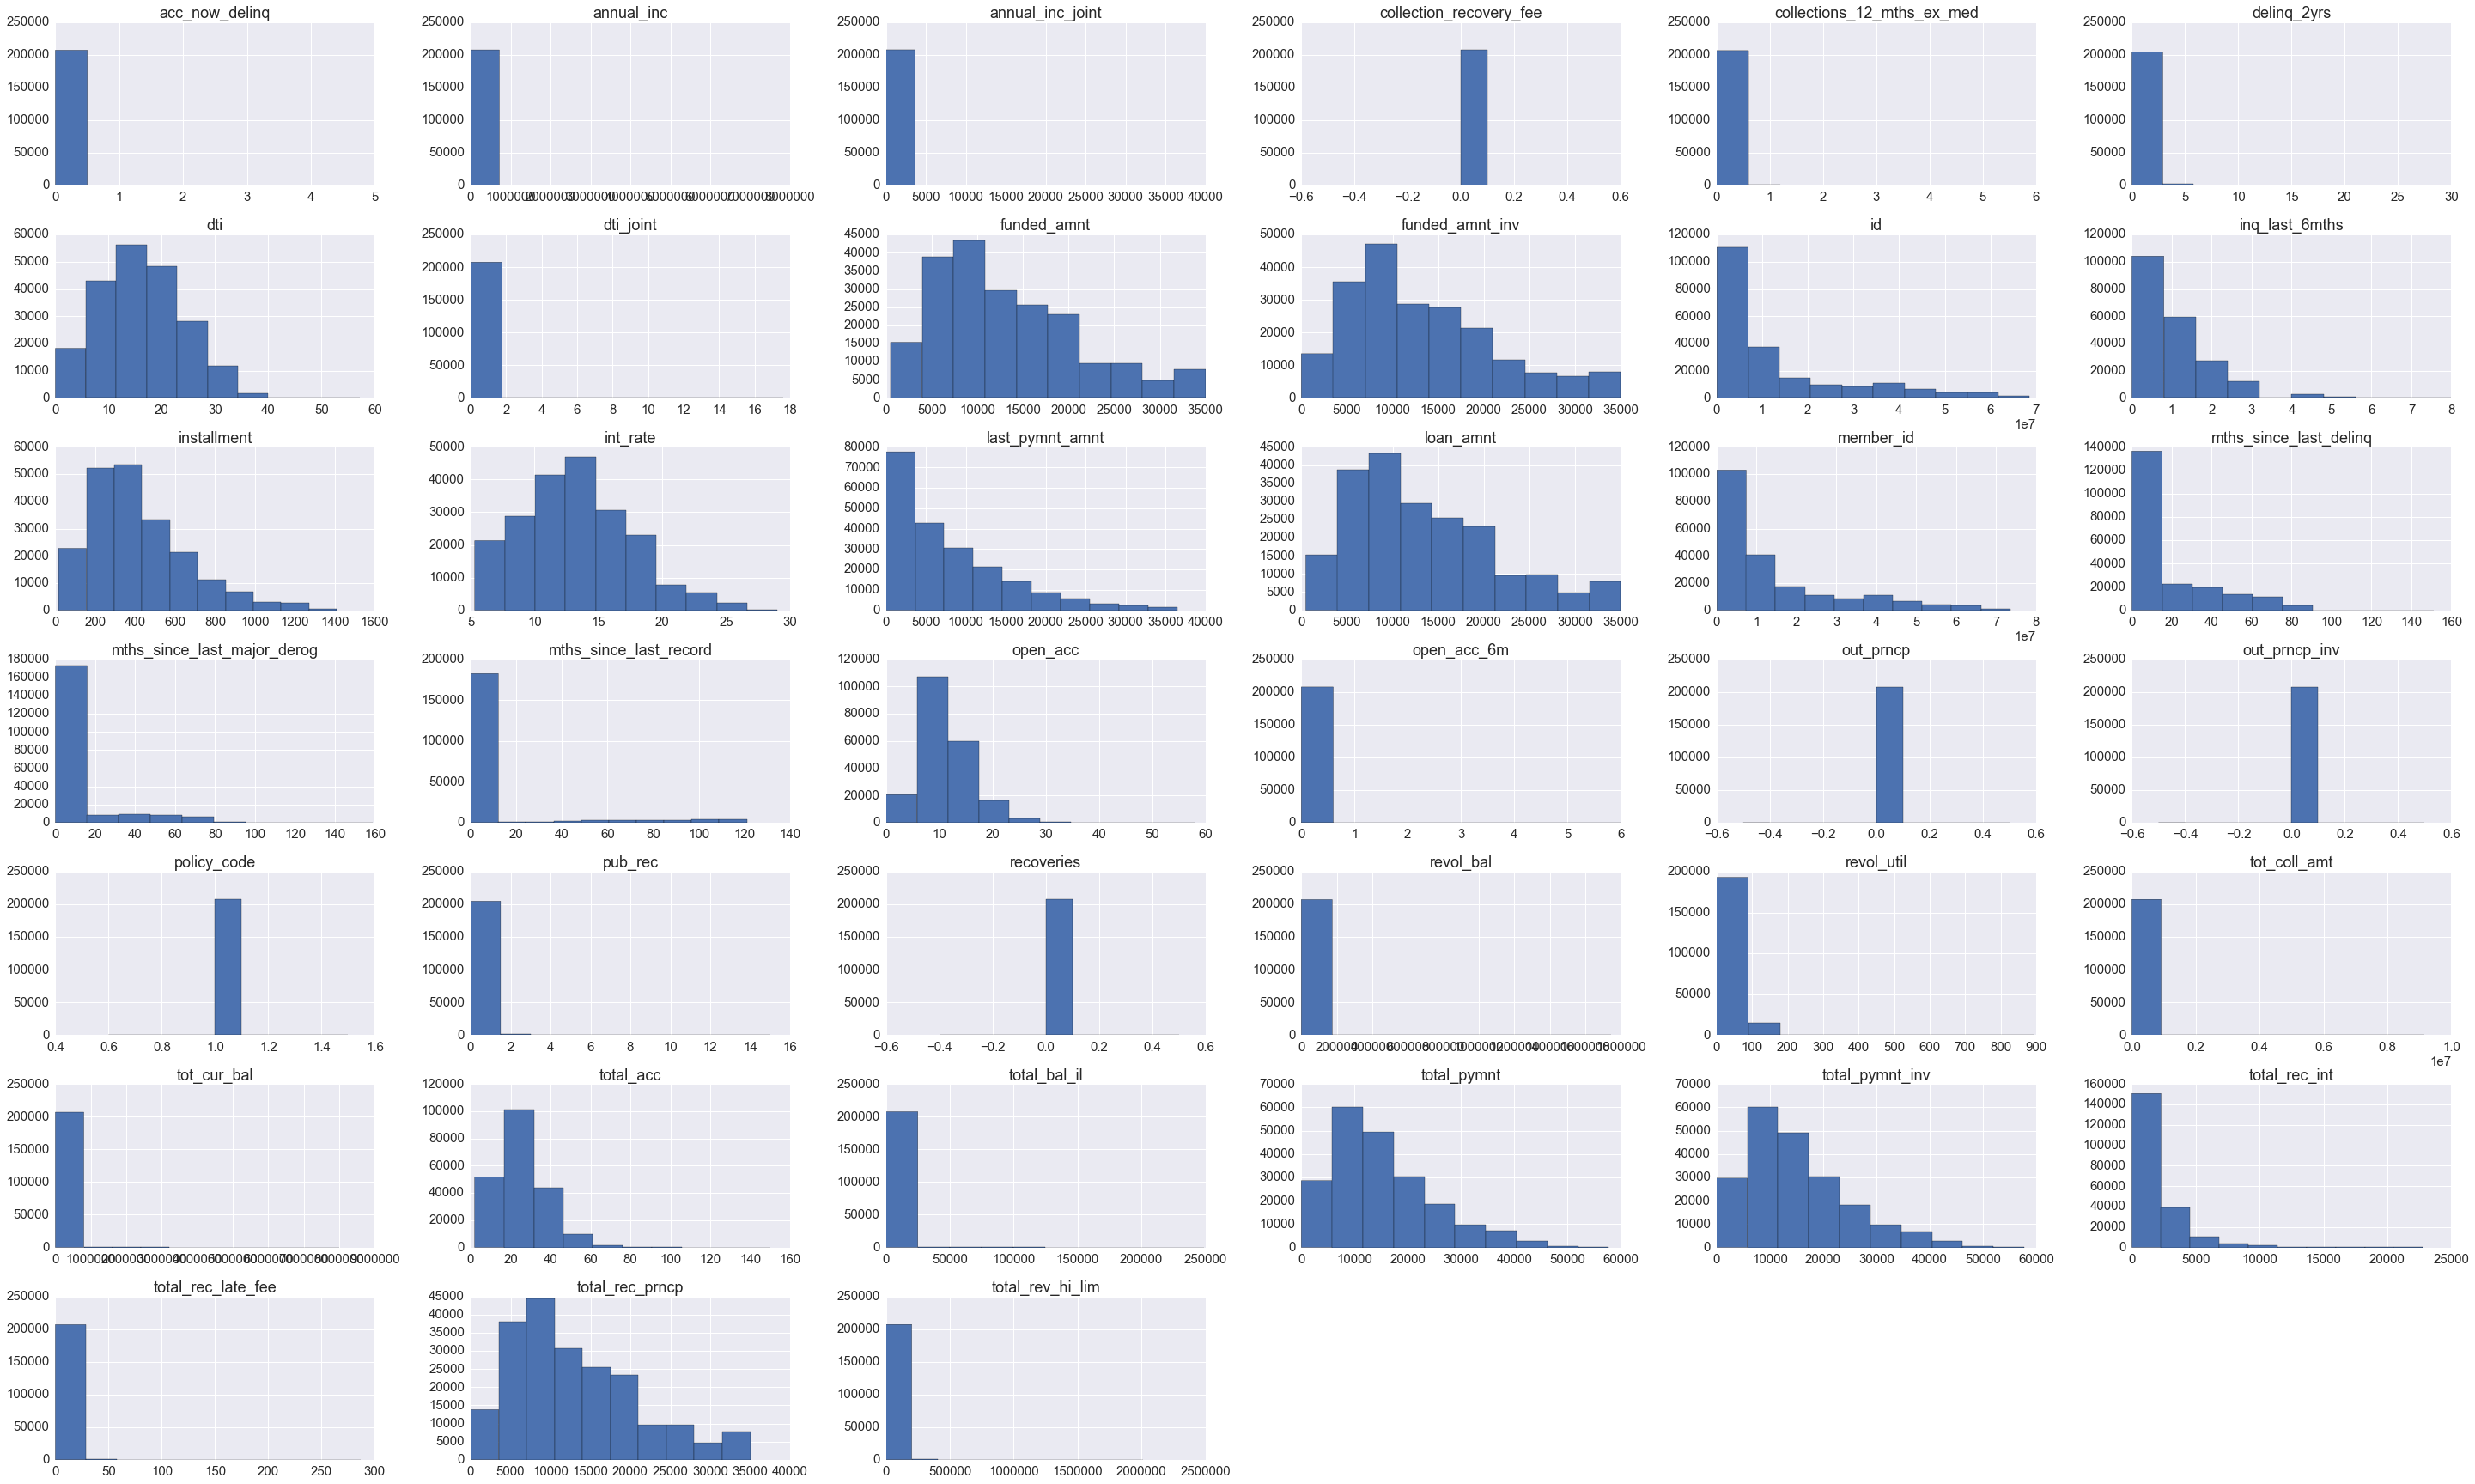

In [29]:
#Let us see what these numeric variables look like

loan_removecol_paid_df.hist(figsize=([50,30]))
plt.title('HIstogram of loans that have been paid off');

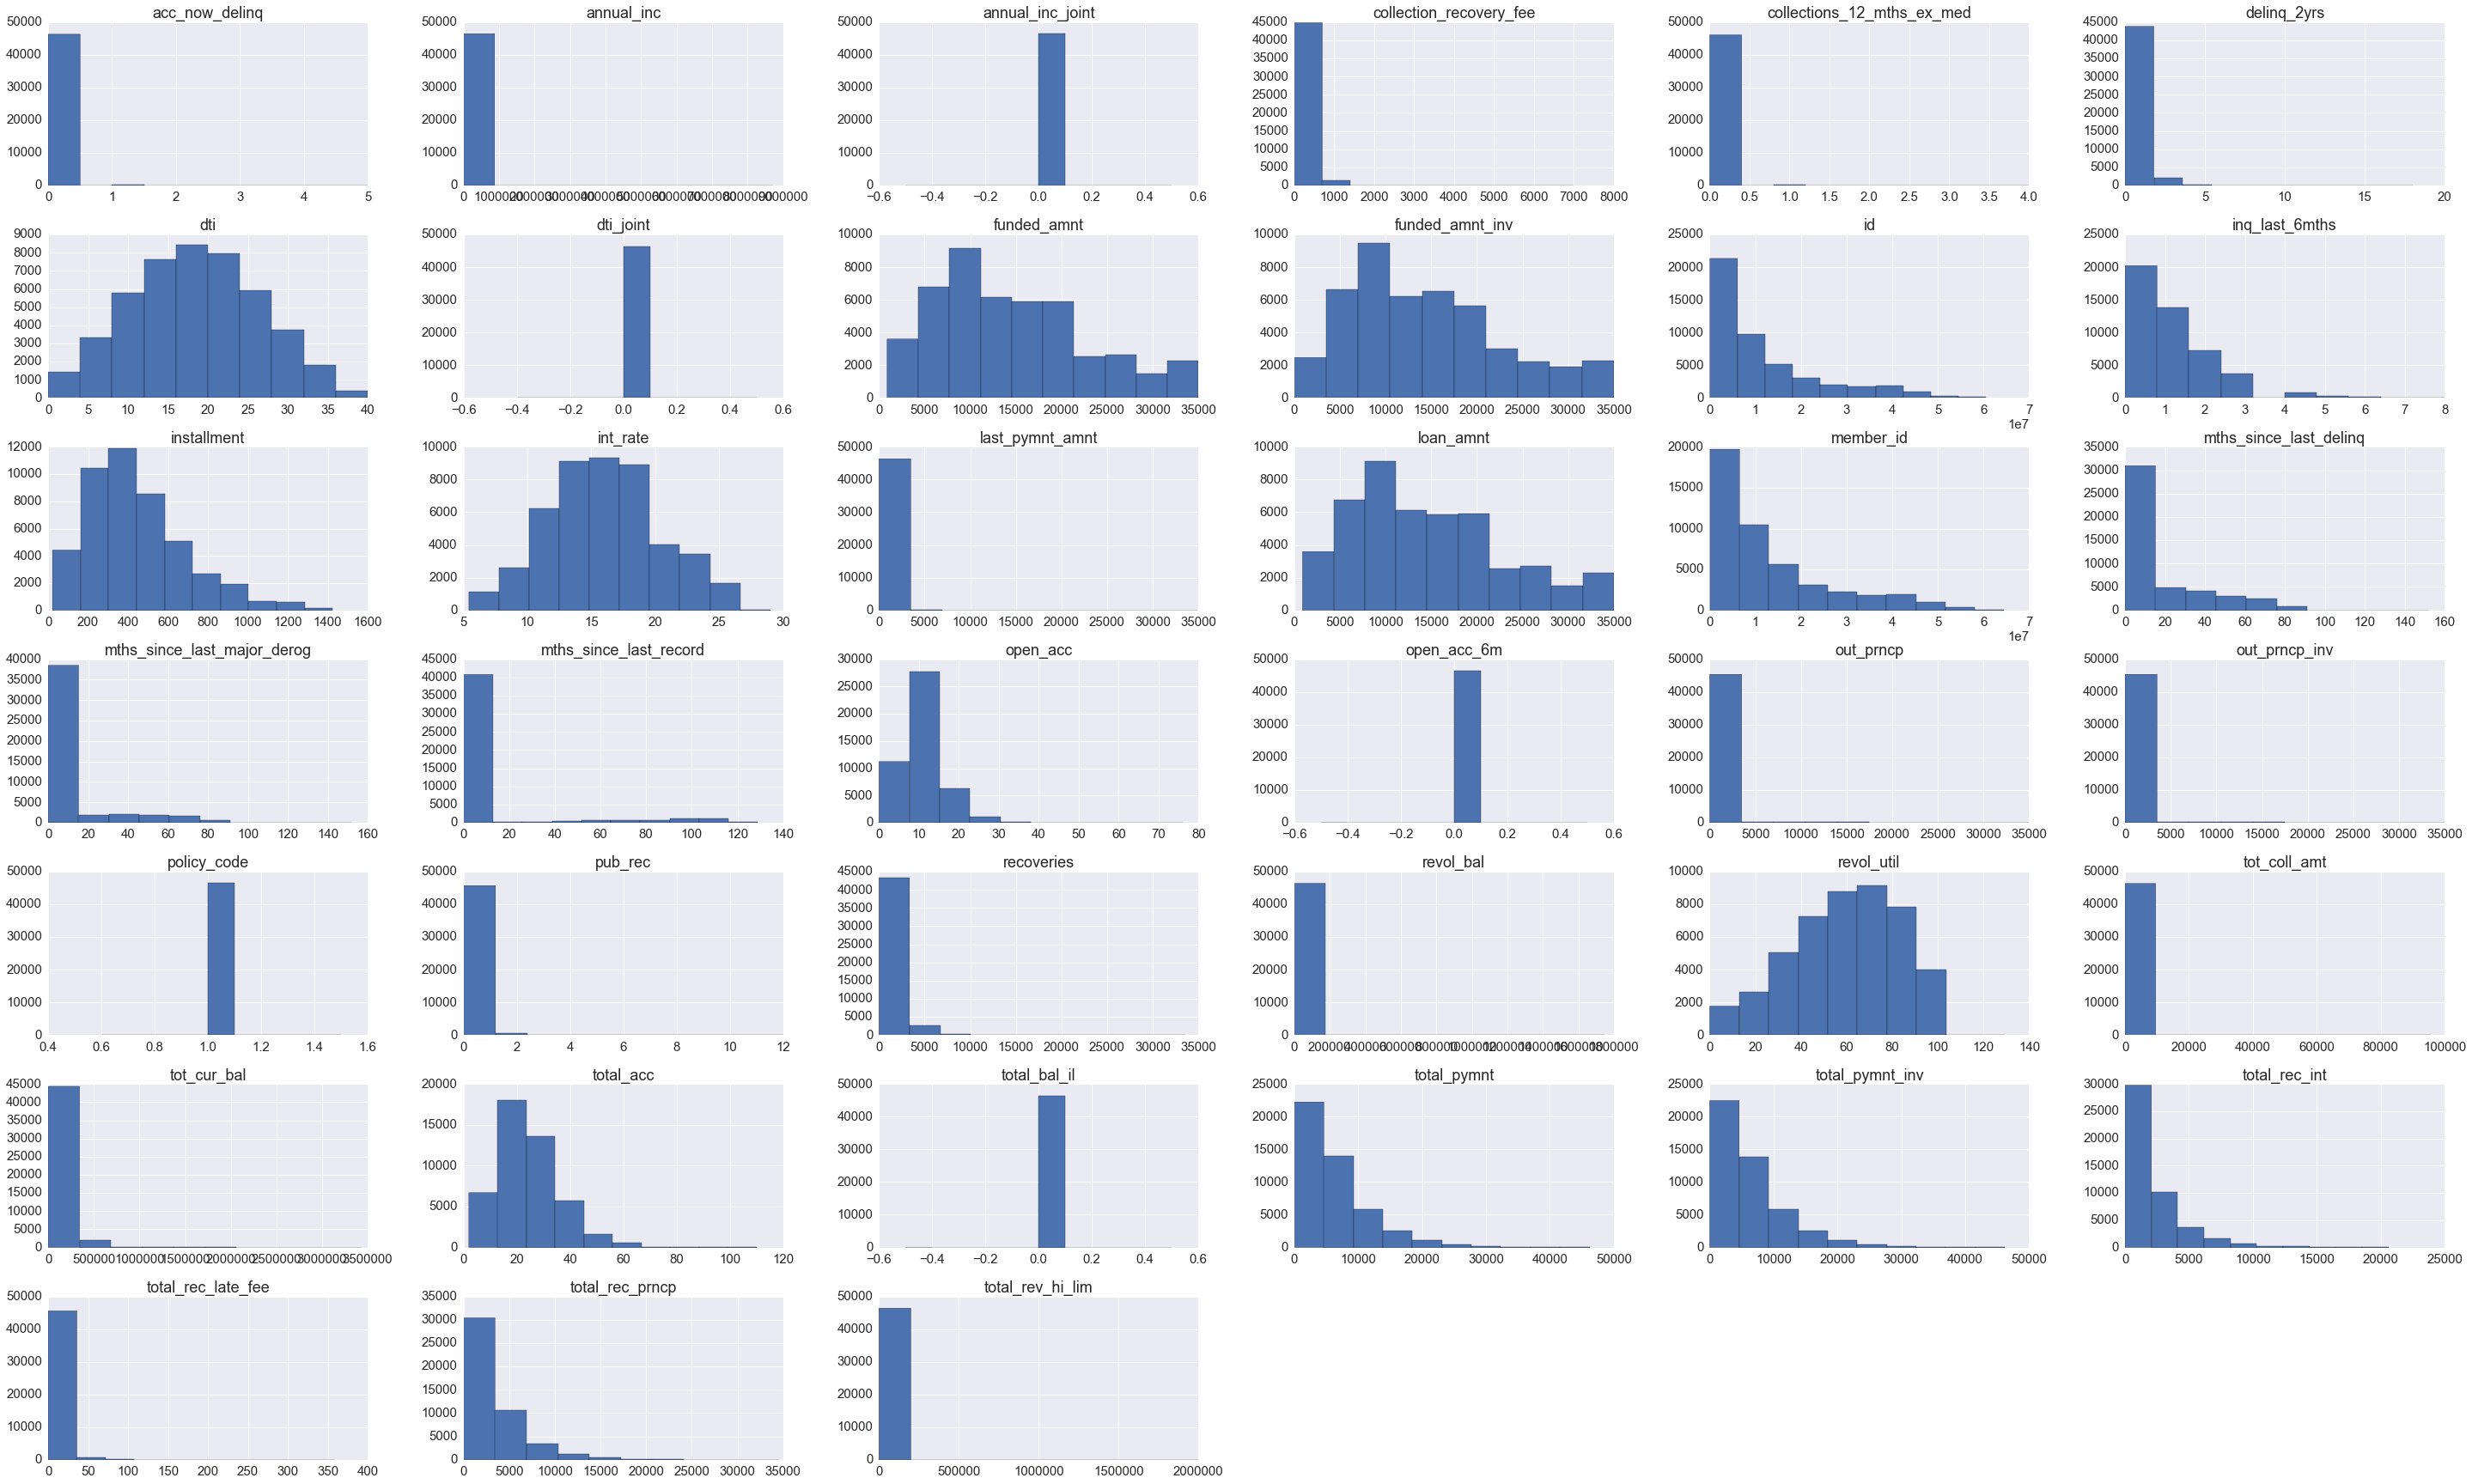

In [30]:
loan_remove_col_default_chargedoff_df.hist(figsize = ([50,30]));

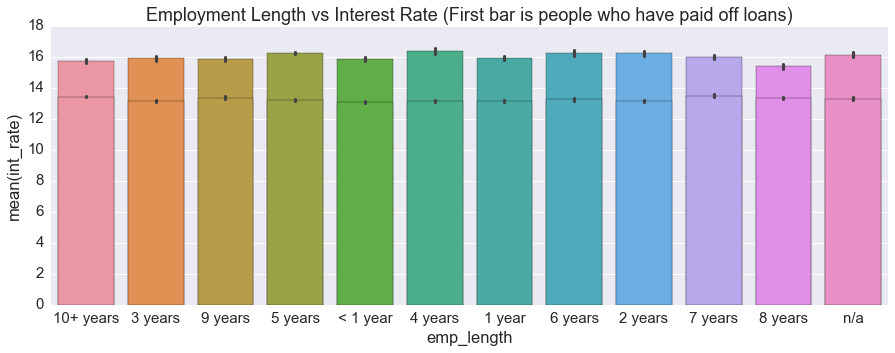

In [31]:
plt.figure(figsize=([15,5]))
plt.title('Employment Length vs Interest Rate (First bar is people who have paid off loans)')
sns.barplot(x=loan_remove_col_default_chargedoff_df.emp_length,y=loan_remove_col_default_chargedoff_df.int_rate)
sns.barplot(x=loan_removecol_paid_df.emp_length,y=loan_removecol_paid_df.int_rate);

- As expected, interest rate is lower across the board for people who have paid off their loans (lower risk). 

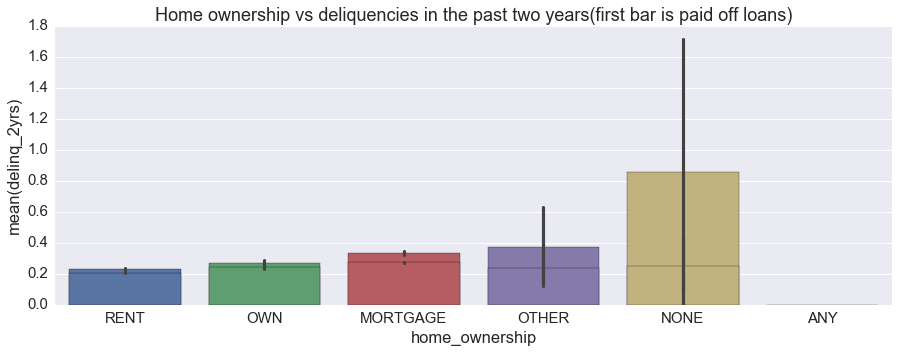

In [32]:
plt.figure(figsize=([15,5]))
plt.title('Home ownership vs deliquencies in the past two years(first bar is paid off loans)')
sns.barplot(x=loan_remove_col_default_chargedoff_df.home_ownership, y=loan_remove_col_default_chargedoff_df.delinq_2yrs)
sns.barplot(x=loan_removecol_paid_df.home_ownership,y=loan_removecol_paid_df.delinq_2yrs);

- For deliquencies in the past two years, the largest difference in the none category.  Here, loans that have defaulted/charged off have a much higher rate of deliquencies that other categories. It may be effective to screen out these loans in your filtering process.

''

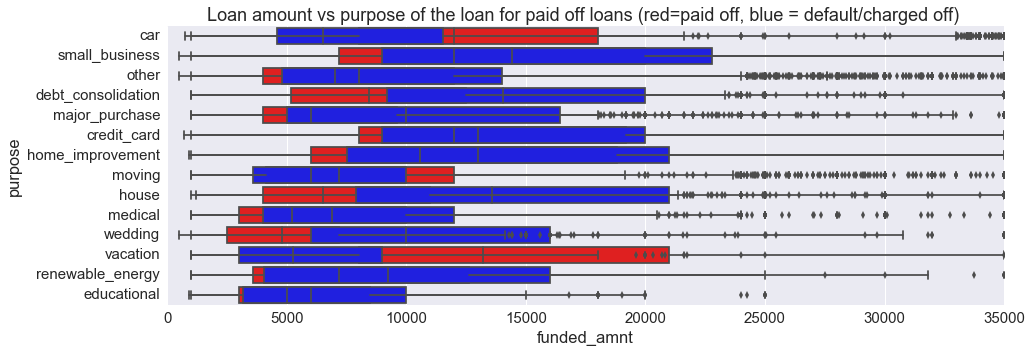

In [33]:
plt.figure(figsize=([15,5]))
plt.title('Loan amount vs purpose of the loan for paid off loans (red=paid off, blue = default/charged off) ')
sns.boxplot(x=loan_removecol_paid_df.funded_amnt,y=loan_removecol_paid_df.purpose,color='red')
sns.boxplot(x=loan_remove_col_default_chargedoff_df.funded_amnt, y=loan_remove_col_default_chargedoff_df.purpose,color='blue')
;

- Comparing these next two graphs, the biggest difference for loans that are not paid off is larger funded amounts for small business, debt consolidation, credit card, home improvement, and house, and renewable energy.

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


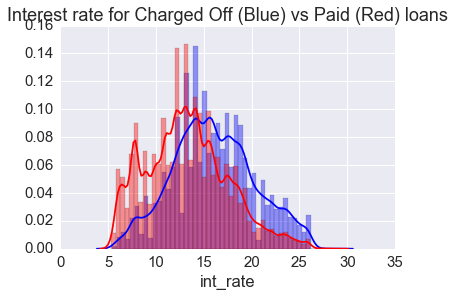

In [34]:
plt.title('Interest rate for Charged Off (Blue) vs Paid (Red) loans')
sns.distplot(loan_remove_col_default_chargedoff_df.int_rate,color='blue')
sns.distplot(loan_removecol_paid_df.int_rate,color='red');

- As epected, due to higher risk, loans that are not paid back have higher interest rate.

''

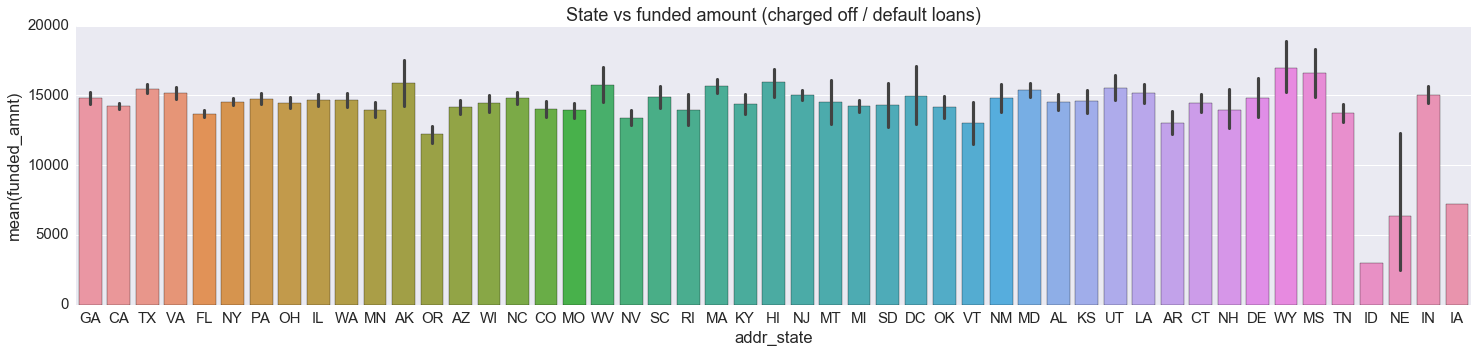

In [35]:
plt.figure(figsize=([25,5]))
plt.title('State vs funded amount (charged off / default loans)')
sns.barplot(x=loan_remove_col_default_chargedoff_df.addr_state, y=loan_remove_col_default_chargedoff_df.funded_amnt)
;

# It looks like ME has a large variance in how much they fund loans for (for paid off loans). The rest of the states look fairly normal.

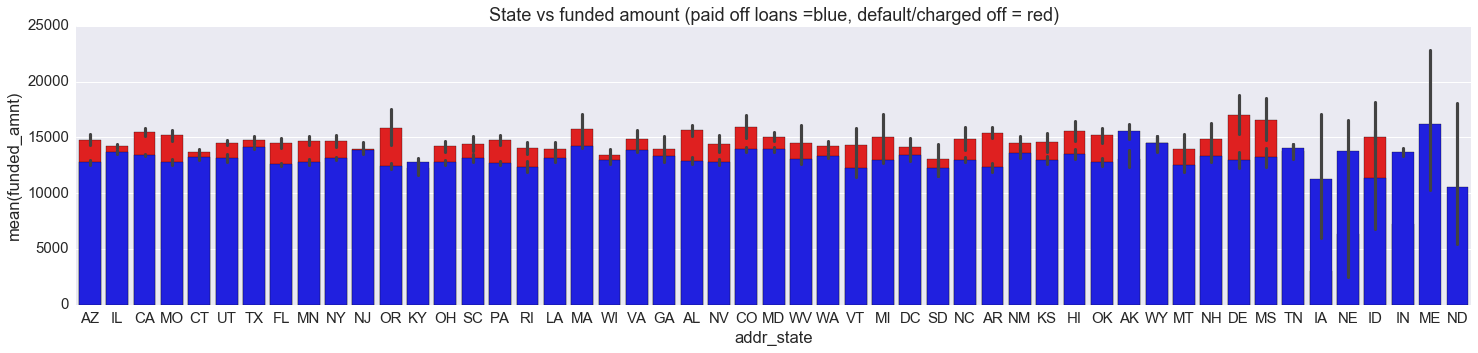

In [36]:
plt.figure(figsize=([25,5]))
plt.title('State vs funded amount (paid off loans =blue, default/charged off = red)')

sns.barplot(x=loan_remove_col_default_chargedoff_df.addr_state, y=loan_remove_col_default_chargedoff_df.funded_amnt,color='red')
sns.barplot(x=loan_removecol_paid_df.addr_state,y=loan_removecol_paid_df.funded_amnt,color='blue');

- In comparing the ammount funded per state, loans that are defaulted have on average a higher loan total value. The biggest discrepancy in funding amounts between these two types of loans are ID, DE, and OR. 

''

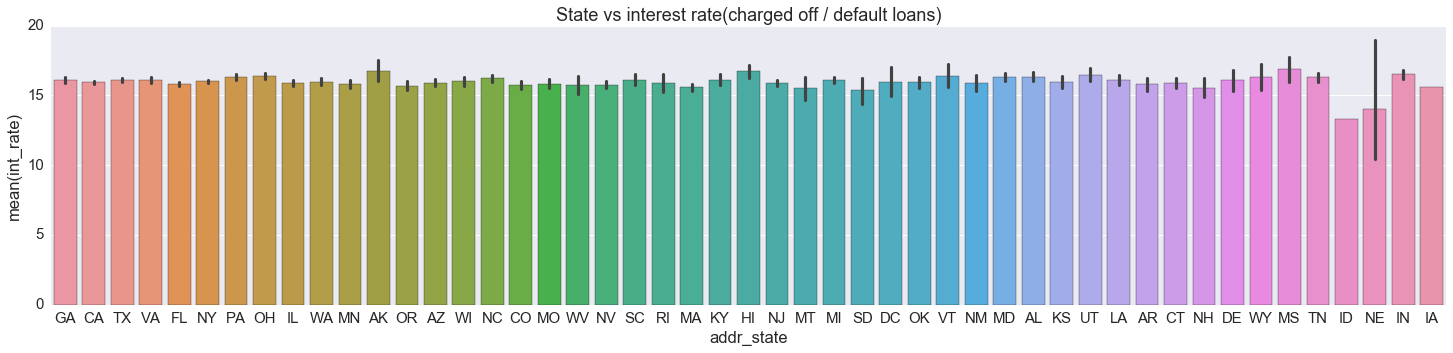

In [37]:
plt.figure(figsize=([25,5]))
plt.title('State vs interest rate(charged off / default loans)')
sns.barplot(x=loan_remove_col_default_chargedoff_df.addr_state, y=loan_remove_col_default_chargedoff_df.int_rate)
;

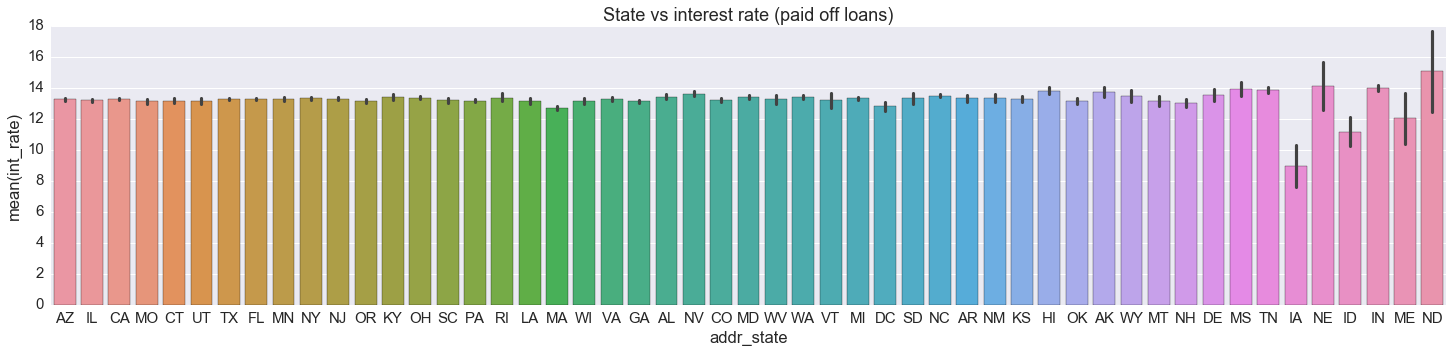

In [38]:
plt.figure(figsize=([25,5]))
plt.title('State vs interest rate (paid off loans)')
sns.barplot(x=loan_removecol_paid_df.addr_state,y=loan_removecol_paid_df.int_rate);

# Highest interest rate states seem to be ND and NE (for paid off loans) and NE, MS, AK, HI (for deafulted / charged off loans). Interest rate is a decent proxy for risk, so these states should be viewed as higher risk than other states for lending out to.

# Statistics and Probability

In [39]:
default_chargedoff_sample_df = loan_remove_col_default_chargedoff_df.sample(100)

In [40]:
paidoff_sample_df = loan_removecol_paid_df.sample(100)

- Below, we can compare the statistics between the two samples.

In [41]:
default_chargedoff_sample_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,total_bal_il,total_rev_hi_lim
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.00000
mean,1.098502e+07,1.226117e+07,14819.250000,14731.250000,14465.481321,17.206200,442.791700,62005.758000,18.171800,0.150000,...,10.370000,1.0,0.0,0.0,0.0,98.850000,74942.580000,0.0,0.0,21995.60000
std,1.357295e+07,1.447321e+07,8305.546746,8243.012326,8289.269058,4.515332,228.715492,26370.984238,8.581928,0.435194,...,22.296285,0.0,0.0,0.0,0.0,507.040201,132565.589064,0.0,0.0,29993.29503
min,3.512430e+05,3.537530e+05,2925.000000,2925.000000,0.000000,5.990000,74.260000,15000.000000,0.010000,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000
25%,1.514560e+06,1.777104e+06,8000.000000,8000.000000,8000.000000,13.610000,276.177500,41500.000000,11.637500,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.000000,4023.500000,0.0,0.0,3900.00000
50%,6.110398e+06,7.214225e+06,14700.000000,14700.000000,14362.500000,17.270000,382.910000,61284.500000,18.110000,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.000000,30063.500000,0.0,0.0,14800.00000
75%,1.253665e+07,1.454878e+07,20000.000000,20000.000000,19431.987500,20.042500,583.170000,78000.000000,23.945000,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.000000,73183.750000,0.0,0.0,27950.25000
max,5.591939e+07,5.958116e+07,35000.000000,35000.000000,35000.000000,25.890000,1017.070000,162000.000000,37.330000,2.000000,...,80.000000,1.0,0.0,0.0,0.0,3831.000000,929765.000000,0.0,0.0,218000.00000


In [42]:
paidoff_sample_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,total_bal_il,total_rev_hi_lim
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,...,100.000000,100.0,100.0,100.0,100.00,100.000000,100.000000,100.0,100.0,100.000000
mean,1.130369e+07,1.242670e+07,12681.250000,12654.250000,12633.472794,13.549300,397.68740,67906.128000,16.239600,0.19000,...,8.350000,1.0,0.0,0.0,0.01,79.190000,95184.470000,0.0,0.0,18420.000000
std,1.472504e+07,1.573180e+07,8218.963179,8234.271857,8234.337237,4.127071,244.12329,40790.916352,8.132097,0.56309,...,19.116535,0.0,0.0,0.0,0.10,567.825779,130776.467865,0.0,0.0,22468.608854
min,2.179870e+05,2.167980e+05,2000.000000,2000.000000,2000.000000,6.030000,69.60000,13200.000000,0.380000,0.00000,...,0.000000,1.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000
25%,1.338757e+06,1.583542e+06,6875.000000,6650.000000,6650.000000,10.772500,216.60750,41500.000000,10.120000,0.00000,...,0.000000,1.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000
50%,5.631232e+06,6.802750e+06,10775.000000,10775.000000,10697.354718,13.590000,352.53500,60000.000000,14.690000,0.00000,...,0.000000,1.0,0.0,0.0,0.00,0.000000,27293.000000,0.0,0.0,13950.000000
75%,1.177784e+07,1.375503e+07,16000.000000,16000.000000,16000.000000,15.800000,497.73250,82500.000000,22.062500,0.00000,...,0.000000,1.0,0.0,0.0,0.00,0.000000,171842.250000,0.0,0.0,24050.000000
max,5.859353e+07,6.243430e+07,35000.000000,35000.000000,35000.000000,26.060000,1095.16000,300000.000000,33.930000,3.00000,...,71.000000,1.0,0.0,0.0,1.00,5496.000000,611487.000000,0.0,0.0,140700.000000


# Compare the sample statistics and population statistics for interest rate for default/charged off vs paid off loans.

In [43]:
default_chargedoff_sample_df.int_rate.describe()

count    100.000000
mean      17.206200
std        4.515332
min        5.990000
25%       13.610000
50%       17.270000
75%       20.042500
max       25.890000
Name: int_rate, dtype: float64

In [44]:
loan_remove_col_default_chargedoff_df.int_rate.describe()

count    46467.000000
mean        16.019092
std          4.301283
min          5.420000
25%         13.050000
50%         15.800000
75%         18.920000
max         28.990000
Name: int_rate, dtype: float64

In [45]:
loan_removecol_paid_df.int_rate.describe()

count    207723.000000
mean         13.274244
std           4.268371
min           5.320000
25%          10.160000
50%          13.110000
75%          15.810000
max          28.990000
Name: int_rate, dtype: float64

In [46]:
default_chargedoff_sample_df.int_rate.describe()

count    100.000000
mean      17.206200
std        4.515332
min        5.990000
25%       13.610000
50%       17.270000
75%       20.042500
max       25.890000
Name: int_rate, dtype: float64

- The sample statistics for our default/charged off loans and paid off loans shows a smaller STD than our population (due to fewer observations samples at the ends of the distribution). In addition, the min and max interest rate are more extreme than in our sample.

## What is the probability that for deafult/charged off loans, you pick 6 loans that are all grade A?

In [47]:
loan_remove_col_default_chargedoff_df.groupby('grade').grade.count()

grade
A     2664
B     9717
C    13002
D    10798
E     6459
F     3013
G      814
Name: grade, dtype: int64

- There are 2664 grade A loans out of 46467 total loand for default or charged off loans. The probability that you pick six grade A loans (assuming each loan has an equal probability of being picked) is $2664/46467 * 2663/46466 * 2662/46465 * 2661/46464 * 2660/46463 * 2659/46462 = 3.5309411533268e-08$

In [48]:
2664/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2663/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2662/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2661/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2660/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()*\
2659/loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()

3.5309411533268e-08

# What is the probability of receiving a paid off loan for each grade? (assuming we are only looking at paid off vs default/charged off loans).

In [49]:
loan_remove_col_default_chargedoff_df.groupby('grade').grade.count()

grade
A     2664
B     9717
C    13002
D    10798
E     6459
F     3013
G      814
Name: grade, dtype: int64

In [82]:
loan_removecol_paid_df.groupby('grade').grade.count()

grade
A    39679
B    66546
C    52678
D    30020
E    12928
F     4726
G     1146
Name: grade, dtype: int64

In [51]:
loan_remove_col_default_chargedoff_df.groupby('grade').grade.count().sum()+loan_removecol_paid_df.groupby('grade').grade.count()

grade
A     86146
B    113013
C     99145
D     76487
E     59395
F     51193
G     47613
Name: grade, dtype: int64

- For grade A, the probability of a paid off loan is 39679/86146= **46%**
- For grade B, the probability of a paid off loan is 66546/113013=**59%**
- For grade C, the probability of a paid off loan is  52678/99145=**53%**
- For grade D, the probability of a paid off loan is 30020/76487=**39**
- For grade E, the probability of a paid off loan is 12928/59395=**22%**
- For grade F, the probability of a paid off loan is 4726/51193=**9%**
- For grade G, the probability of a paid off loans is 1146/47613=**2.4%**

In [89]:
1146/47613

0.024069056770209818

# What is the probability of have a paid off loan given that your loan amount is between 0-2k, 2k-5k,5k-10k,10k-20k,20k+ (This assumes we are only looking at paid off or default/charged off loans).

In [53]:
#loan_amnt 

In [54]:
#number of default or charged off loans with loan amount 0-2k
loan_remove_col_default_chargedoff_df[loan_remove_col_default_chargedoff_df.loan_amnt<2000].id.count()

504

In [55]:
#loan amount 0-2k for default or charged off loans
loan_removecol_paid_df[loan_removecol_paid_df.loan_amnt<2000].id.count()

3207

- Probability of having a loan paid off with borrowed amount between 0k-2k (not including 2k) is 3207/(3207+504) =**86.4%**

In [56]:
#number of default or charged off loans with loan amount 2-5k
loan_remove_col_default_chargedoff_df[loan_remove_col_default_chargedoff_df.loan_amnt<2000].id.count()

504

### Now for 2-5k

In [57]:
#loan amount 2-5k for paid off loans


loan_removecol_paid_df.loc[(loan_removecol_paid_df.loan_amnt>=2000)\
                           & (loan_removecol_paid_df.loan_amnt<5000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

20169

In [58]:
#loan amount 2-5k for default / charged off loans

loan_remove_col_default_chargedoff_df.loc[(loan_remove_col_default_chargedoff_df.loan_amnt>=2000)\
                           & (loan_remove_col_default_chargedoff_df.loan_amnt<5000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

3870

- The probability of having a paid off loan with funding amount bewteen 2-5k (not including 5k) is 20169/(20169+3870)=**83.9%**

In [59]:
20169/(20169+3870)

0.8390116061400225

### Now, for funding amount 5-10k.

In [60]:
#loan amount 5-10k for paid off loans


loan_removecol_paid_df.loc[(loan_removecol_paid_df.loan_amnt>=5000)\
                           & (loan_removecol_paid_df.loan_amnt<10000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

54947

In [61]:
#loan amount 5-10k for default / charged off loans

loan_remove_col_default_chargedoff_df.loc[(loan_remove_col_default_chargedoff_df.loan_amnt>=5000)\
                           & (loan_remove_col_default_chargedoff_df.loan_amnt<10000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

10552

The probability of having a paid off loan for funding amount between 5-10k (not including 10k) is 54947/(54947 + 10552) =  **83.8%**

In [62]:
54947/(54947 + 10552)

0.8388983037908976

### Now, for  funding 10k-20k

In [63]:
#loan amount 10-20k for paid off loans


loan_removecol_paid_df.loc[(loan_removecol_paid_df.loan_amnt>=10000)\
                           & (loan_removecol_paid_df.loan_amnt<20000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

83777

In [64]:
#loan amount 10-20k for default / charged off loans

loan_remove_col_default_chargedoff_df.loc[(loan_remove_col_default_chargedoff_df.loan_amnt>=10000)\
                           & (loan_remove_col_default_chargedoff_df.loan_amnt<20000),'loan_amnt'].count()


#f.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

19305

The probability of having a paid off loan with a funding amount between 10k-20k (not including 20k) is 83777/(83777+19305) = **81.27 %**

In [65]:
83777/(83777+19305)

0.8127219107118605

## Now, for funding amount 20k+

In [66]:
#number of default or charged off loans with loan amount 20k+
loan_remove_col_default_chargedoff_df[loan_remove_col_default_chargedoff_df.loan_amnt>=20000].id.count()

12236

In [67]:
#loan amount 20k+ for default or charged off loans
loan_removecol_paid_df[loan_removecol_paid_df.loan_amnt>=20000].id.count()

45623

- The probability of having a funded loan for loan amount of 20k+ ( including 20k) is 12236 / (12236+45623) = **21.14%**

In [68]:
12236 / (12236+45623)

0.21147963151800064

# The probability of having a paid off loan remains between 88%-81% for loan amounts of 0-20k. However, for funding amounts of 20k+ the probability of being repaid drops to 21%.

# Make histograms of late fees sample vs. population for default/charged off loans and paid off loans. 

In [69]:
#total_rec_late_fee

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


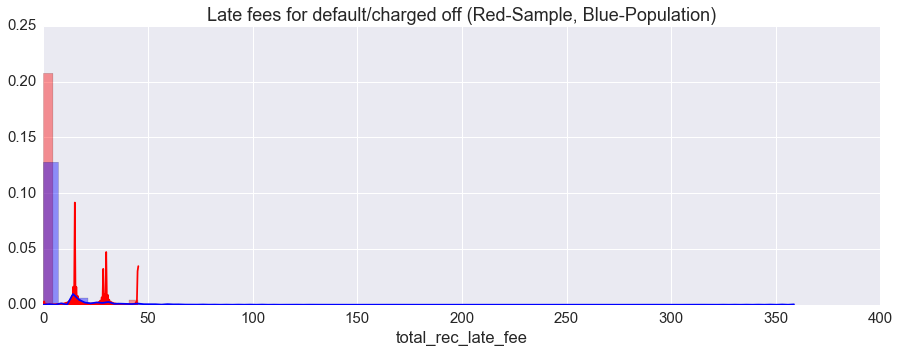

In [70]:
plt.figure(figsize=([15,5]))
plt.title('Late fees for default/charged off (Red-Sample, Blue-Population)')
sns.distplot(default_chargedoff_sample_df.total_rec_late_fee,color='red')
sns.distplot(loan_remove_col_default_chargedoff_df.total_rec_late_fee,color='blue');

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


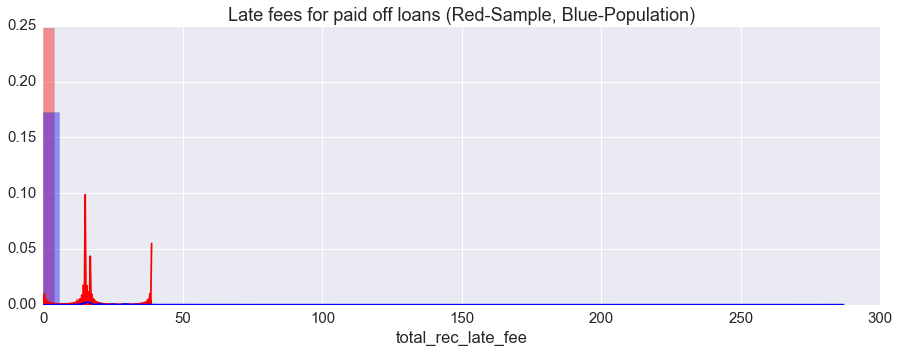

In [71]:
plt.figure(figsize=([15,5]))
plt.title('Late fees for paid off loans (Red-Sample, Blue-Population)')
sns.distplot(paidoff_sample_df.total_rec_late_fee,color='red')
sns.distplot(loan_removecol_paid_df.total_rec_late_fee,color='blue');

We can see that there are fewer extreme values in our sample histogram (red) compared to our population histrogram (blue) for recovered late fees. The right tail for the poulation is significantly longer than the tail for the sample. Since we have such a large skew, we could limit out sample size to late fees collected between 0-50 dollars to have a better idea of the distribution (greater than 0 and less than 50).

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


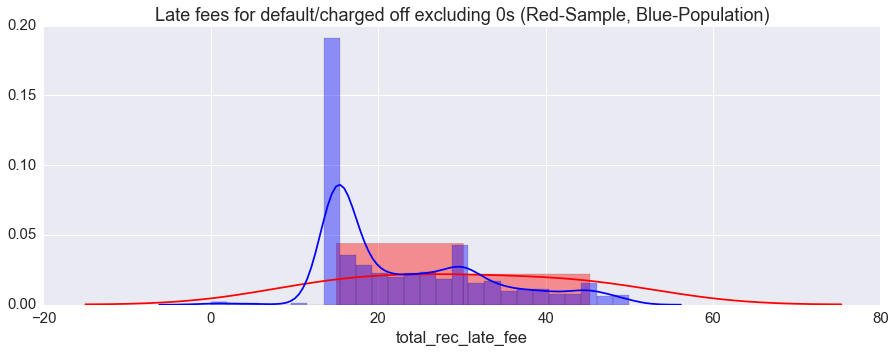

In [72]:
plt.figure(figsize=([15,5]))
plt.title('Late fees for default/charged off excluding 0s (Red-Sample, Blue-Population)')
less_than_50_s = default_chargedoff_sample_df.loc[(default_chargedoff_sample_df.total_rec_late_fee<50) & (default_chargedoff_sample_df.total_rec_late_fee>0),'total_rec_late_fee']
less_than_50_p = loan_remove_col_default_chargedoff_df.loc[(loan_remove_col_default_chargedoff_df.total_rec_late_fee<50) &(loan_remove_col_default_chargedoff_df.total_rec_late_fee>0),'total_rec_late_fee']
sns.distplot(less_than_50_s,color='red')
sns.distplot(less_than_50_p,color='blue');

- When we exclude zero ,which is the overwhelming majority of loans, we see than on average late fees collected average around 11-12. We can see the differences between the sample and the population above (for default/charged off loans).

# Compare population and sample statistics for debt to income ratio (dti) for default/charged off and paid off loans.

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


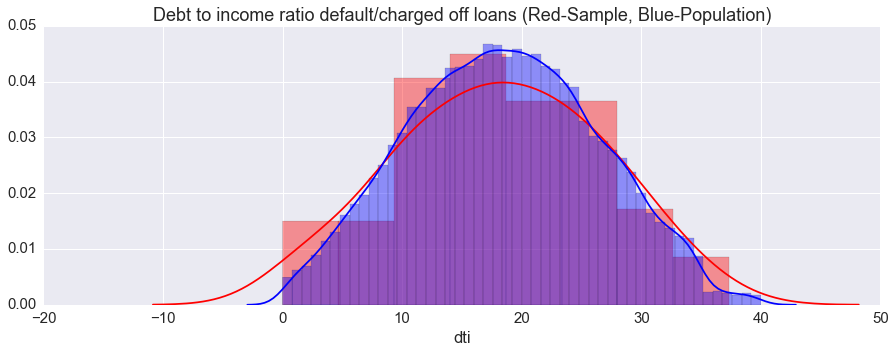

In [73]:
plt.figure(figsize=([15,5]))
plt.title('Debt to income ratio default/charged off loans (Red-Sample, Blue-Population)')
sns.distplot(default_chargedoff_sample_df.dti,color='red')
sns.distplot(loan_remove_col_default_chargedoff_df.dti,color='blue');

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


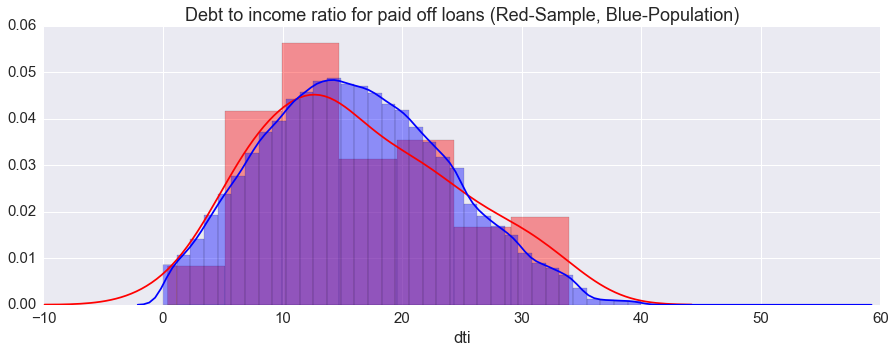

In [74]:
plt.figure(figsize=([15,5]))
plt.title('Debt to income ratio for paid off loans (Red-Sample, Blue-Population)')
sns.distplot(paidoff_sample_df.dti,color='red')
sns.distplot(loan_removecol_paid_df.dti,color='blue');

- Here, our sample values show the characteristics of a t-distribution, shorter peark and fatter tails. This is due to the central limit theorem, as the number of samples increases, your sampling distribution approximates a normal distribution for the population. In our case, our population (blue) represent an almost normal distribution ( with some right skew).

# Random variables and distributions

- Here, different variables will be examined to determine what types of distributions they follow. 
- First, let's examine debt to income ratios for default/charged off and paid off loans

In [75]:
from scipy import stats

In [76]:
print(loan_data_removecol_df.dti.mean(), 'mean dti')
print(loan_data_removecol_df.dti.std(),'std dti ')
dti_normal = stats.norm(loan_data_removecol_df.dti.mean(),loan_data_removecol_df.dti.std())

16.560533931311213 mean dti
7.794390100390713 std dti 


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


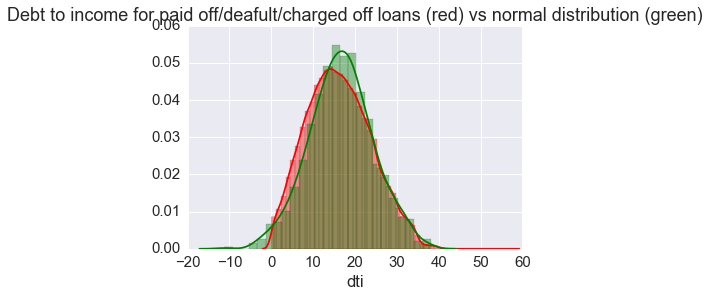

In [77]:
#loan_data_removecol_df.annual_inc
plt.title('Debt to income for paid off/deafult/charged off loans (red) vs normal distribution (green)')
sns.distplot(loan_removecol_paid_df.dti,color='red')
sns.distplot(dti_normal.rvs(1000),color='green');

In [78]:
dti_normal.cdf(10)

0.19997810055938803

- The debt to income ratio appears to resemble a normal distribution with mean centered at 16.5 and standard deviation at 7.79. Using the cdf of the normal distribution, we see that there is a 20% chance of have a dti of 10 or less.

### Next, the variable months since last deliquency will be examined (for default/charged off/paid off loans).

In [79]:
#loan_data_removecol_df.mths_since_last_delinq.mean()


fit_alpha, fit_loc, fit_beta=stats.gamma.fit(loan_data_removecol_df.mths_since_last_delinq)
print(fit_alpha,'alpha fit',fit_beta,' beta fit',fit_loc, ' location fit')
fitted_gamma = stats.gamma(fit_alpha, fit_loc, fit_beta)
#x= arange(10000)
#fitted_gamma_pdf =fitted_gamma.pdf(x)

0.377527540528 alpha fit 15.3360146154  beta fit -2.92078838542e-27  location fit


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


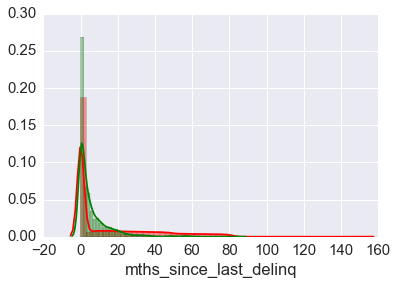

In [80]:
sns.distplot(loan_data_removecol_df.mths_since_last_delinq,color='red')
sns.distplot(fitted_gamma.rvs(1000),color='green');

In [81]:
1-fitted_gamma.cdf(10)

0.18569992169499761

- Months since last delinqency follows a gamma distribution with mean centered around 0, alpha = .377, and beta = -2.92. Using the CDF of this distribution, we can find probability than any given loan (that has defaulted, charged off, or bee paid off) has more than 10 months since the borrower's last delinquency, which is ~18.6%.
 